In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [18]:
from exp.nb_datablock import *
from exp.nb_metrics import *
from exp.nb_train import *

In [3]:
seed_everything(42)

In [4]:
dls = get_data(42, 64, 256, fold=0)

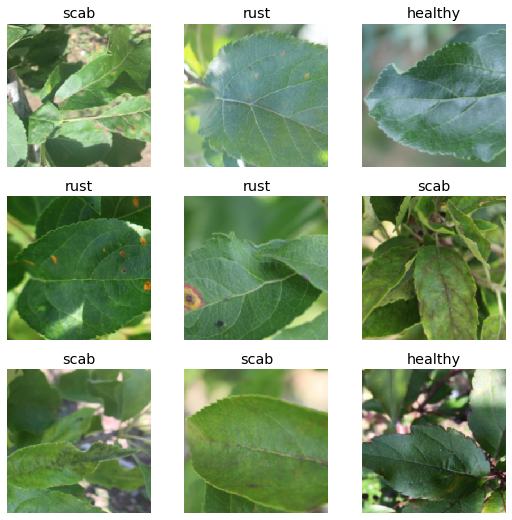

In [5]:
dls.show_batch()

In [8]:
data = [get_data(42, 64, 256, i) for i in range(5)]

In [9]:
def get_learner(fold_num, lr=1e-3):
    ARCH = resnet34
    opt_func = partial(Adam, lr=lr, wd=0.01, eps=1e-8)

    learn = cnn_learner(
        data[fold_num], ARCH, opt_func=opt_func,
        loss_func=LabelSmoothingCrossEntropy(),
        metrics=[
            AccumMetric(healthy_roc_auc, flatten=False),
            AccumMetric(multiple_diseases_roc_auc, flatten=False),
            AccumMetric(rust_roc_auc, flatten=False),
            AccumMetric(scab_roc_auc, flatten=False),
            AccumMetric(comp_metric, flatten=False)]
        )

    return learn

@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.0005754399462603033)

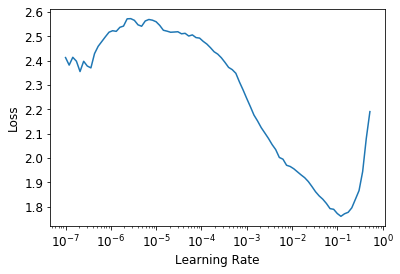

In [10]:
get_learner(fold_num=0).lr_find()

@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


epoch,train_loss,valid_loss,healthy_roc_auc,multiple_diseases_roc_auc,rust_roc_auc,scab_roc_auc,comp_metric,time
0,1.618311,0.890054,0.907471,0.699328,0.931427,0.941673,0.869975,00:43


epoch,train_loss,valid_loss,healthy_roc_auc,multiple_diseases_roc_auc,rust_roc_auc,scab_roc_auc,comp_metric,time
0,1.152808,0.796118,0.927073,0.668268,0.957727,0.949976,0.875761,00:52


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


epoch,train_loss,valid_loss,healthy_roc_auc,multiple_diseases_roc_auc,rust_roc_auc,scab_roc_auc,comp_metric,time
0,1.573056,0.847264,0.936651,0.684211,0.944556,0.945742,0.877790,00:43


epoch,train_loss,valid_loss,healthy_roc_auc,multiple_diseases_roc_auc,rust_roc_auc,scab_roc_auc,comp_metric,time
0,1.230851,0.809183,0.945467,0.718230,0.965457,0.957524,0.896670,00:52


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


epoch,train_loss,valid_loss,healthy_roc_auc,multiple_diseases_roc_auc,rust_roc_auc,scab_roc_auc,comp_metric,time
0,1.571553,0.850727,0.911989,0.617855,0.962198,0.943337,0.858845,00:44


epoch,train_loss,valid_loss,healthy_roc_auc,multiple_diseases_roc_auc,rust_roc_auc,scab_roc_auc,comp_metric,time
0,1.170068,0.792497,0.933304,0.686256,0.977419,0.952735,0.887428,00:52


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


epoch,train_loss,valid_loss,healthy_roc_auc,multiple_diseases_roc_auc,rust_roc_auc,scab_roc_auc,comp_metric,time
0,1.639615,0.918455,0.933284,0.706487,0.938844,0.948946,0.881890,00:42


epoch,train_loss,valid_loss,healthy_roc_auc,multiple_diseases_roc_auc,rust_roc_auc,scab_roc_auc,comp_metric,time
0,1.284948,0.809697,0.948891,0.693802,0.956720,0.967135,0.891637,00:51


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


epoch,train_loss,valid_loss,healthy_roc_auc,multiple_diseases_roc_auc,rust_roc_auc,scab_roc_auc,comp_metric,time
0,1.613685,0.867288,0.952237,0.728003,0.956082,0.934488,0.892703,00:43


epoch,train_loss,valid_loss,healthy_roc_auc,multiple_diseases_roc_auc,rust_roc_auc,scab_roc_auc,comp_metric,time
0,1.196287,0.838549,0.961314,0.778581,0.965793,0.938776,0.911116,00:51


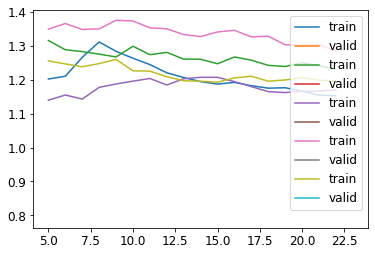

In [11]:
train(get_learner, 5, 'resnet_model_')

In [12]:
all_val_preds, all_val_labels = validate(get_learner, 5,'resnet_model_' )

@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


In [13]:
print_metrics(np.concatenate(all_val_preds), np.concatenate(all_val_labels))

Comp metric: 0.9224076166313324
Healthy metric: 0.9628055481303276
Multi disease: 0.7871816045226452
Rust metric: 0.9751561456626503
Scab metric: 0.9644871682097068


In [21]:
test_df = pd.read_csv('data/test.csv')

In [25]:
all_test_preds = test(dls,test_df,  get_learner, 5, 'resnet_model_')

@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


@log_args had an issue on LabelSmoothingCrossEntropy.__init__ -> missing a required argument: 'self'


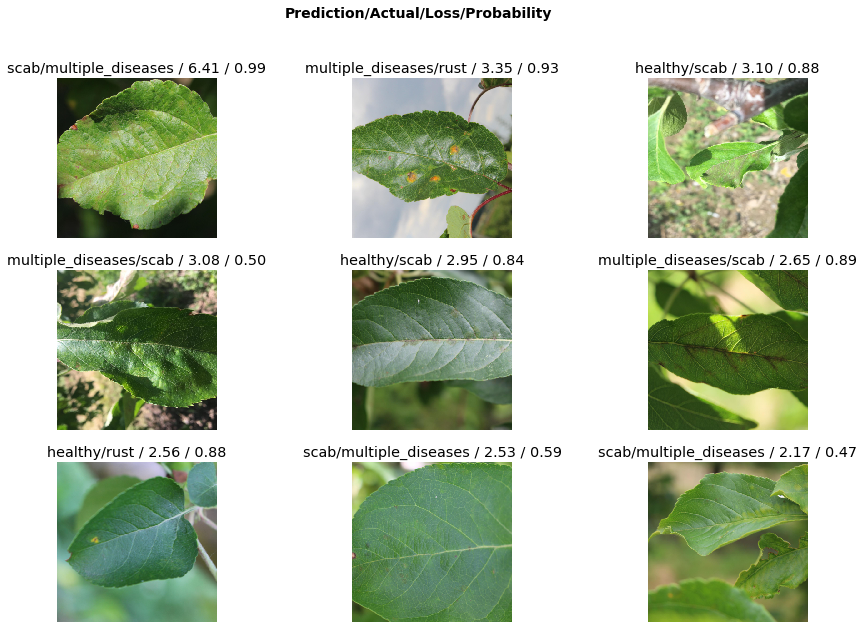

In [29]:
interp.plot_top_losses(9, figsize=(15, 10))

In [26]:
test_df_output = pd.concat([test_df, pd.DataFrame(np.mean(np.stack(all_test_preds), axis=0), columns=LABEL_COLS)], axis=1)

In [27]:
test_df_output.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.168843,0.133000,0.691348,0.006810
1,Test_1,0.512065,0.049385,0.275712,0.162838
2,Test_2,0.385039,0.052843,0.151620,0.410497
3,Test_3,0.597157,0.005466,0.372683,0.024694
4,Test_4,0.054042,0.103820,0.796488,0.045650


In [28]:
test_df_output.to_csv('submission.csv', index=False)